In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import inverse_kinematics_objective, draw_solutions
from idea import IDEA

In [6]:
rectangles = [((0.4, 2.), (5., 4.)), ((-5., 2.), (-0.8, 4.)), ((-0.5, 2.), (0.1, 4.)),
              ((-5., 5.), (-0.3, 6.)), ((-0.1, 5.), (5., 6.))]
target_x = 1.
target_y = 8.
S = [0.7] * 10 + [0.3] * 10
d = len(S)
x_min = -np.pi
x_max = np.pi

objective = inverse_kinematics_objective(S, (target_x, target_y), rectangles)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.7
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations = 300

populations, scores = IDEA(objective, n_constraints, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m, num_iterations, log_interval=20)

/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 295, best: [36.46096076  0.        ], #infeasible: 305, best: [11.93055068  1.        ]
Iteration 20, #feasible: 180, best: [29.50869732  0.        ], #infeasible: 420, best: [0.60039366 1.        ]
Iteration 40, #feasible: 180, best: [27.07647459  0.        ], #infeasible: 420, best: [0.08247935 1.        ]
Iteration 60, #feasible: 180, best: [26.75679219  0.        ], #infeasible: 420, best: [0.0038539 1.       ]
Iteration 80, #feasible: 180, best: [24.72085652  0.        ], #infeasible: 420, best: [3.27486738e-04 1.00000000e+00]
Iteration 100, #feasible: 180, best: [11.36048168  0.        ], #infeasible: 420, best: [1.91386538e-04 1.00000000e+00]
Iteration 120, #feasible: 180, best: [10.22446838  0.        ], #infeasible: 420, best: [4.66215247e-05 1.00000000e+00]
Iteration 140, #feasible: 180, best: [9.82782187 0.        ], #infeasible: 420, best: [4.66215247e-05 1.00000000e+00]
Iteration 160, #feasible: 180, best: [9.42972219 0.        ], #infeasible: 420, 

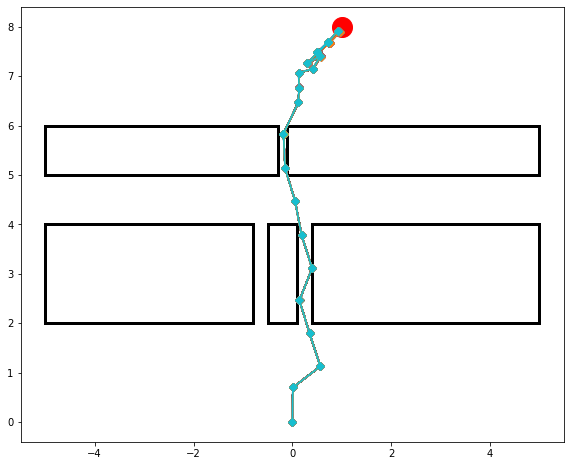

In [7]:
mask = scores[-1][:, 1] == 0.
feasible_population = populations[-1][mask, :]
draw_solutions(feasible_population, S, (target_x, target_y), rectangles, figsize=(10, 8))

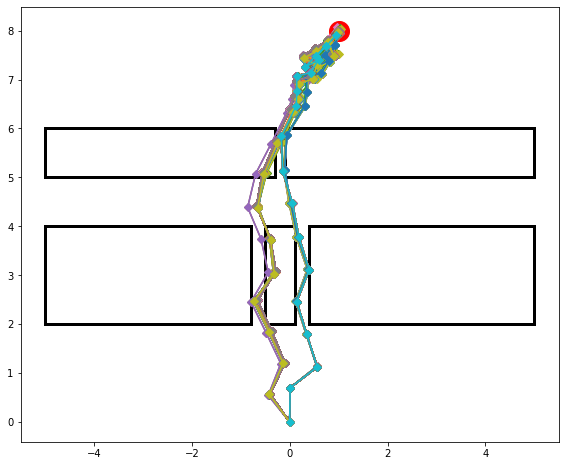

In [8]:
infeasible_population = populations[-1][~mask, :]
draw_solutions(infeasible_population, S, (target_x, target_y), rectangles, figsize=(10, 8))